# Different types of data

+ <u>Cross-sectional data</u> -
    Cross-sectional data or cross-section of a population is obtained by taking
    observations from multiple individuals at the same point in time.


+ <u>Time series data</u>-
    A time series is made up of quantitative observations on
    one or more measurable characteristics of an individual entity and taken at
    multiple points in time.
    
    
+ <u>Panel data</u>-
  If we observe multiple entities over multiple
  points in time we get a panel data also known as longitudinal data.


# Dataset

               Nifty50 data from 1-04-2010 to 1-04-2018
            

https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm


+ Here we have Nifty50 data for years 2010 to 2018

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'],index_col=['Date'])

In [3]:
#adding a new column for years
Nifty_data['year']=Nifty_data.index.map(lambda x:x.year)

In [4]:
#adding a new column for months
Nifty_data['month']=Nifty_data.index.map(lambda x:x.month)

In [5]:
Nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2010-04-01 to 2018-03-28
Data columns (total 8 columns):
Open                 1987 non-null float64
High                 1987 non-null float64
Low                  1987 non-null float64
Close                1987 non-null float64
Shares Traded        1987 non-null int64
Turnover (Rs. Cr)    1987 non-null float64
year                 1987 non-null int64
month                1987 non-null int64
dtypes: float64(5), int64(3)
memory usage: 139.7 KB


### We do not have Null values

In [6]:
Nifty_data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),year,month
Date,,,,,,,,
2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,2010,4
2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,2010,4
2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,2010,4
2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,2010,4
2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,2010,4


## Internal structures of time series

  A time series can be expressed as $x_t = f_t + s_t + c_t + e_t,$ which is a sum of the trend, seasonal, cyclical, and irregular components in that
  order.Here, t is the time index at which observations about the series have been
taken at t = 1,2,3 ...N successive and equally spaced points in time.

  + ***<u>General trend</u>***
   When a time series exhibits an upward or downward movement in the long run,
it is said to have a general trend.

+ ***<u>Seasonality***</u>
  Seasonality manifests as repetitive and period variations in a time series. In most
  cases, exploratory data analysis reveals the presence of seasonality.


+ ***<u>Cyclical movements***</u>
  Cyclical changes are movements observed after every few units of time, but they
occur less frequently than seasonal fluctuations. Unlike seasonality, cyclical
changes might not have a fixed period of variations.


+ ***<u>Unexpected variations***</u>
  This
fourth component reflects unexpected variations in the time series. Unexpected
variations are stochastic and cannot be framed in a mathematical model for a
definitive future prediction. This type of error is due to lack of information about
explanatory variables that can model these variations or due to presence of a
random noise.

#### Plotting of Nifty50 data to visualize some aspects

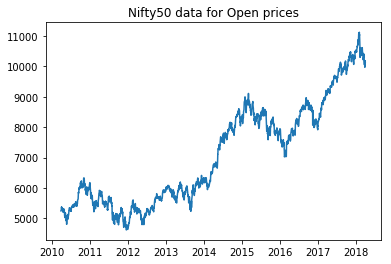

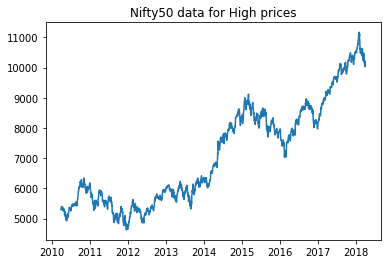

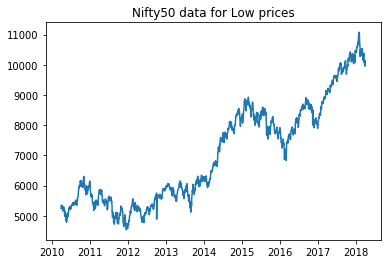

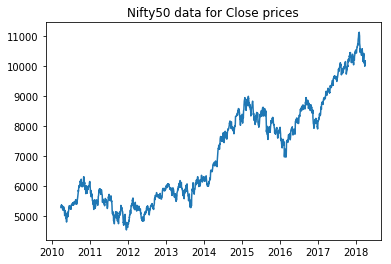

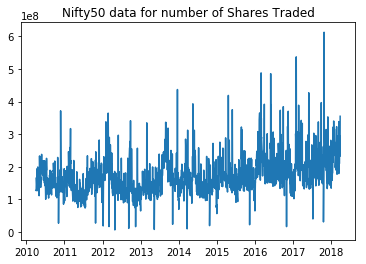

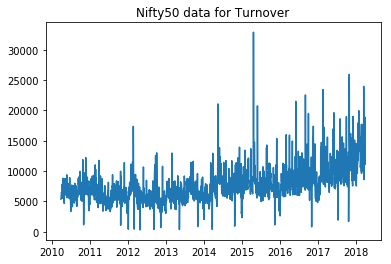

In [7]:
plt.plot(Nifty_data[['Open']])
plt.title('Nifty50 data for Open prices')
plt.show()
plt.plot(Nifty_data[['High']])
plt.title('Nifty50 data for High prices')
plt.show()
plt.plot(Nifty_data[['Low']])
plt.title('Nifty50 data for Low prices')
plt.show()
plt.plot(Nifty_data[['Close']])
plt.title('Nifty50 data for Close prices')
plt.show()
plt.plot(Nifty_data[['Shares Traded']])
plt.title('Nifty50 data for number of Shares Traded')
plt.show()
plt.plot(Nifty_data[['Turnover (Rs. Cr)']])
plt.title('Nifty50 data for Turnover')
plt.show()

##### As we can see there see there General trend is present in our data
#### To detrend the data,we will use use Linear regression.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# fitting trend model
trend_model_Close = LinearRegression(normalize=True, fit_intercept=True)
trend_model_Close.fit(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])
print('Trend model coefficient={} and intercept={}'.format(trend_model_Close.coef_[0],trend_model_Close.intercept_))

Trend model coefficient=2.6913413176792385 and intercept=4408.797165656242


In [10]:
trend_model_Close.score(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])

0.8432054012083128

Text(0,0.5,'Close prices')

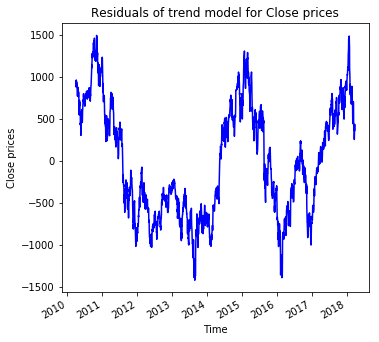

In [11]:
residuals_Close = np.array(Nifty_data['Close']) - trend_model_Close.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals_Close, index=Nifty_data.index).plot(color='b')
plt.title('Residuals of trend model for Close prices')
plt.xlabel('Time')
plt.ylabel('Close prices')


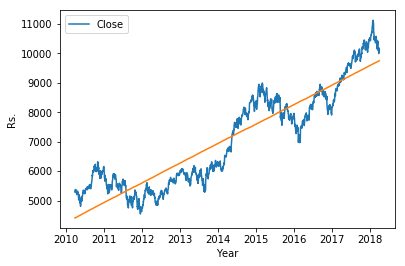

In [12]:
# plotting data with trend line
plt.plot(Nifty_data['Close'])
plt.plot(pd.Series(trend_model_Close.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1))),index=Nifty_data.index))
plt.xlabel('Year')
plt.ylabel('Rs.')
plt.legend()
plt.show()

In [13]:
# adding columns to dataset i.e. Residuals_close and Quarter 
Nifty_data['Residuals_Close'] = residuals_Close
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
Nifty_data['Quarter'] = Nifty_data['month'].map(lambda m: month_quarter_map.get(m))

In [14]:
# Creating new subseries
seasonal_sub_series_Close = Nifty_data.groupby(by=['year', 'Quarter'])['Residuals_Close'].aggregate([np.mean, np.std])
seasonal_sub_series_Close.columns = ['Quarterly Mean Close', 'Quarterly Standard Deviation Close']

In [15]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_Close.reset_index(inplace=True)
seasonal_sub_series_Close.index = seasonal_sub_series_Close['year'].astype(str) + '-' + seasonal_sub_series_Close['Quarter']
seasonal_sub_series_Close.head()

,year,Quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,684.573634,160.825413
2010-Q3,2010,Q3,874.214640,188.131505
2010-Q4,2010,Q4,1201.765925,160.041830
2011-Q1,2011,Q1,565.246327,237.989246
2011-Q2,2011,Q2,411.484778,224.565694


## A practical technique of determining seasonality is through exploratory data
## analysis through the following plots:
1. Run sequence plot
2. Seasonal sub series plot
3. Multiple box plots

## Seasonal sub series plot
For a known periodicity of seasonal variations, seasonal sub series redraws the
original series over batches of successive time periods.
A seasonal sub series reveals two properties:
+ Variations within seasons as within a batch of successive months
+ Variations between seasons as between batches of successive months

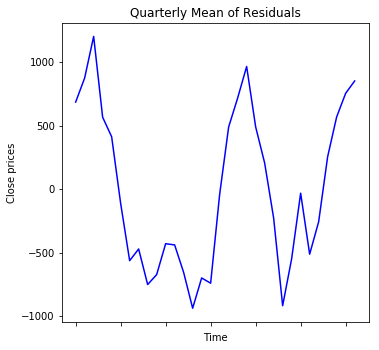

In [16]:
# Seasonal sub series plot
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_Close['Quarterly Mean Close'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('Close prices')
plt.xticks(rotation=30)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

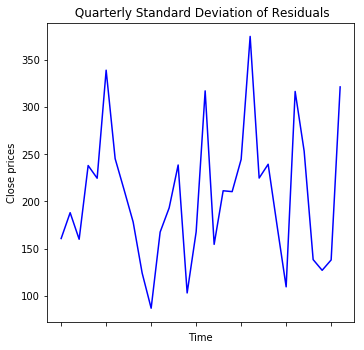

In [17]:
# Seasonal sub series plot
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_Close['Quarterly Standard Deviation Close'].plot(color='b')
plt.title(' Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('Close prices')
plt.xticks(rotation=30)

In [18]:
seasonal_sub_series_Close.head()

,year,Quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,684.573634,160.825413
2010-Q3,2010,Q3,874.214640,188.131505
2010-Q4,2010,Q4,1201.765925,160.041830
2011-Q1,2011,Q1,565.246327,237.989246
2011-Q2,2011,Q2,411.484778,224.565694


# Multiple box plots
A box plot displays both
central tendency and dispersion within the seasonal data over a batch of time
units.Besides, separation between two adjacent box plots reveal the within season variations

Text(0,0.5,'Residuals_Close')

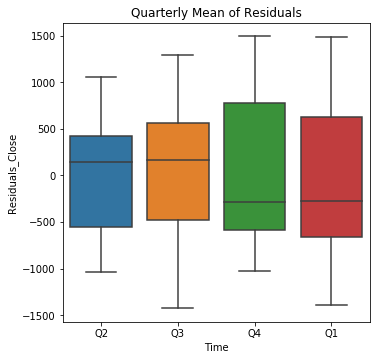

In [19]:
# Multiple Boxplot(Quarterly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals_Close','Quarter']], y=Nifty_data['Residuals_Close'], x=Nifty_data['Quarter'])
g.set_title('Quarterly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals_Close')

Text(0,0.5,'Residuals_Close')

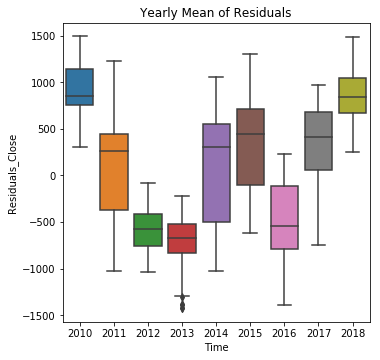

In [20]:
# Multiple Boxplot(Yearly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals_Close','year']], y=Nifty_data['Residuals_Close'], x=Nifty_data['year'])
g.set_title('Yearly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals_Close')

Text(0,0.5,'Residuals_Close')

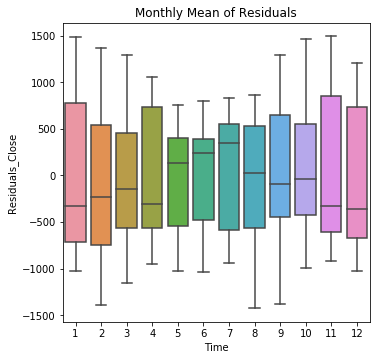

In [21]:
# Multiple Boxplot(Monthly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals_Close','month']], y=Nifty_data['Residuals_Close'], x=Nifty_data['month'])
g.set_title('Monthly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals_Close')

In [22]:
seasonal_sub_series_Close.head()

,year,Quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,684.573634,160.825413
2010-Q3,2010,Q3,874.214640,188.131505
2010-Q4,2010,Q4,1201.765925,160.041830
2011-Q1,2011,Q1,565.246327,237.989246
2011-Q2,2011,Q2,411.484778,224.565694


In [23]:
Nifty_data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),year,month,Residuals_Close,Quarter
Date,,,,,,,,,,
2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,2010,4,881.702834,Q2
2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,2010,4,956.911493,Q2
2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,2010,4,951.820152,Q2
2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,2010,4,957.778810,Q2
2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,2010,4,884.887469,Q2


## Run sequence plot
A simple run sequence plot of the original time series with time on x-axis and the
variable on y-axis is good for indicating the following properties of the time
series:
+ Movements in mean of the series
+ Shifts in variance
+ Presence of outliers

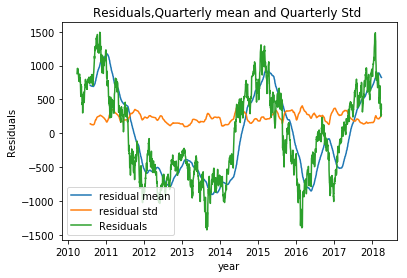

In [24]:
# Run sequence plot Quarterly
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=90).mean(),label='residual mean')
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=90).std(),label='residual std')
plt.plot(Nifty_data[['Residuals_Close']],label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Quarterly mean and Quarterly Std ')
plt.legend()
plt.show()

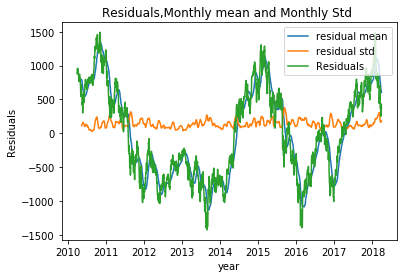

In [25]:
# Run sequence plot Monthly
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=30).mean(),label='residual mean')
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=30).std(),label='residual std')
plt.plot(Nifty_data[['Residuals_Close']],label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Monthly mean and Monthly Std ')
plt.legend()
plt.show()

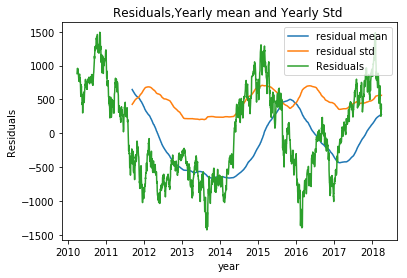

In [26]:
# Run sequence plot Yearly
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=365).mean(),label='residual mean')
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=365).std(),label='residual std')
plt.plot(Nifty_data[['Residuals_Close']],label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Yearly mean and Yearly Std ')
plt.legend()
plt.show()

##### Ridge Regression


Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

 Here, alpha is a complexity parameter that controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [27]:
# fitting the model in data using Ridge regression 
from sklearn import linear_model
ridg_reg = linear_model.Ridge (alpha = .5)
ridg_reg.fit (np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
ridg_reg.coef_

array([2.69134132])

In [29]:
ridg_reg.intercept_ 

4408.797167700219

####  Setting the regularization parameter: generalized Cross-Validation
    RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same   way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV)

In [30]:
# generalized cross validation
ridg_reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
ridg_reg.fit (np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [31]:
ridg_reg.score(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])

0.8432054012083112

In [32]:
ridg_reg.alpha_ 

10.0

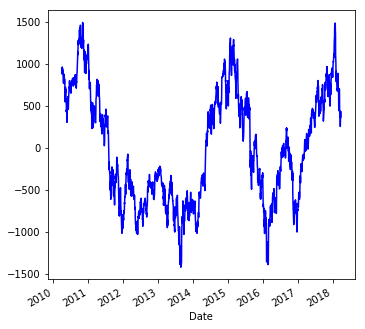

In [33]:
residuals_Ridge = np.array(Nifty_data['Close']) - ridg_reg.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals_Ridge, index=Nifty_data.index).plot(color='b')

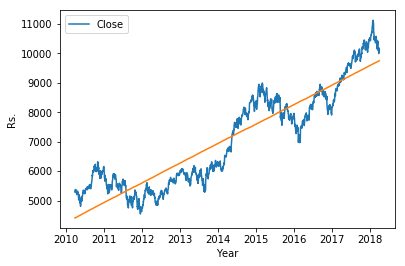

In [34]:
plt.plot(Nifty_data['Close'])
plt.plot(pd.Series(ridg_reg.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1))),index=Nifty_data.index))
plt.xlabel('Year')
plt.ylabel('Rs.')
plt.legend()
plt.show()

#### Lassao regression
    The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to      prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is  dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under     certain  conditions, it can recover the exact set of non-zero weights
    
    
    

In [35]:
#fitting lassao Regression
lass_reg = linear_model.Lasso(alpha = 0.1)
lass_reg.fit(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

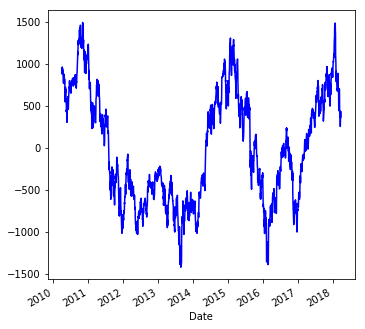

In [36]:
residuals_lassao = np.array(Nifty_data['Close']) - ridg_reg.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals_Ridge, index=Nifty_data.index).plot(color='b')

In [37]:
lass_reg.score(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close']) 

0.8432054012083019

In [38]:
lass_reg.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1)))

array([4408.79746747, 4411.48880848, 4414.18014949, ..., 9748.41803873,
       9751.10937974, 9753.80072076])

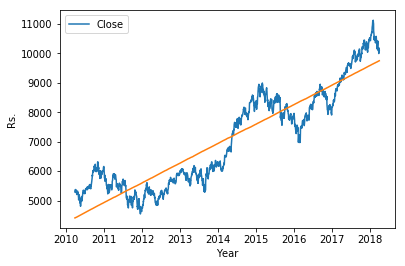

In [39]:
plt.plot(Nifty_data['Close'])
plt.plot(pd.Series(lass_reg.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1))),index=Nifty_data.index))
plt.xlabel('Year')
plt.ylabel('Rs.')
plt.legend()
plt.show()

# baysienRidge

In [40]:
# fittng model using baysienRidge Regression
bay_reg = linear_model.BayesianRidge()
bay_reg.fit(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

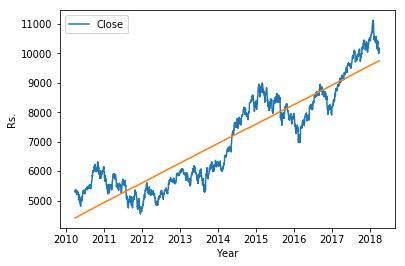

In [41]:
plt.plot(Nifty_data['Close'])
plt.plot(pd.Series(bay_reg.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1))),index=Nifty_data.index))
plt.xlabel('Year')
plt.ylabel('Rs.')
plt.legend()
plt.show()

In [42]:
bay_reg.score(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])

0.8432053938161388

In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='grey',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if(dftest[1]>0.05):
        print("Time Series is not stationary")
    else:
        print("Time series is stationary")
     

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


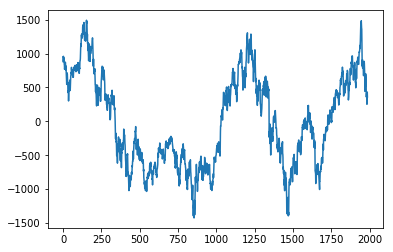

In [44]:
plt.plot(residuals_Close)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  


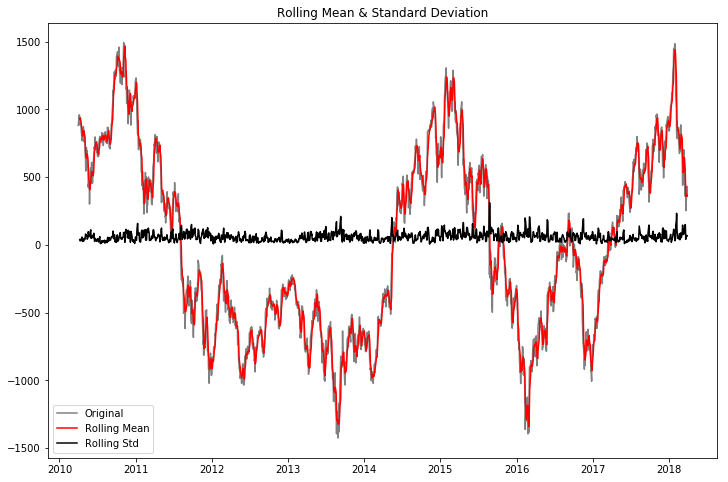

Results of Dickey-Fuller Test:
Test Statistic                   -2.597383
p-value                           0.093539
#Lags Used                        1.000000
Number of Observations Used    1985.000000
Critical Value (1%)              -3.433649
Critical Value (5%)              -2.862997
Critical Value (10%)             -2.567546
dtype: float64
Time Series is not stationary


In [45]:
#Applying dickey fuller test on residuals
test_stationarity(Nifty_data['Residuals_Close'])

In [46]:
# calculating Moving -average
Moving_avg_res=Nifty_data['Residuals_Close'].rolling(window=5,center=True).mean()
# the center is true to calculate symmetrical moving average

In [47]:
# apply differencing using moving average
stationary_close=pd.Series(Nifty_data['Residuals_Close'],index=Nifty_data.index)-Moving_avg_res

In [48]:
stationary_close=stationary_close.dropna()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  


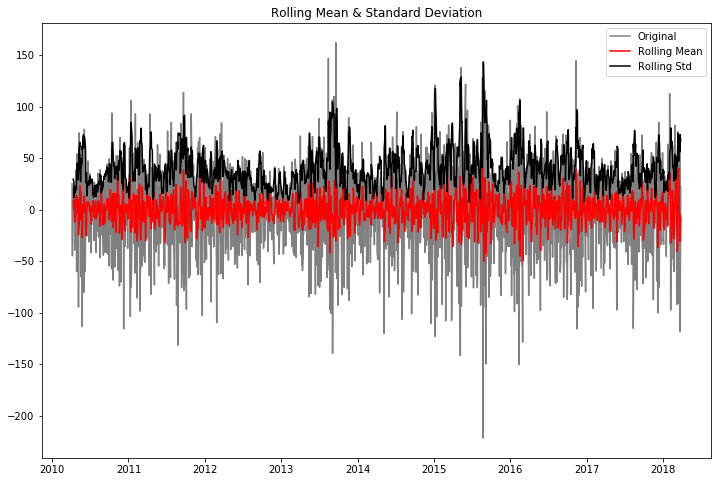

Results of Dickey-Fuller Test:
Test Statistic                -1.505681e+01
p-value                        9.124862e-28
#Lags Used                     2.400000e+01
Number of Observations Used    1.958000e+03
Critical Value (1%)           -3.433694e+00
Critical Value (5%)           -2.863017e+00
Critical Value (10%)          -2.567556e+00
dtype: float64
Time series is stationary


In [49]:
test_stationarity(stationary_close)

**Time series is become stationary**

In [50]:
from statsmodels.tsa import seasonal
decompose_model5 = seasonal.seasonal_decompose(Nifty_data['Close'],freq=5)

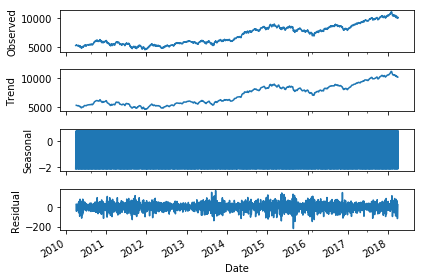

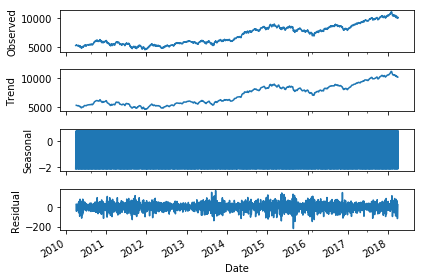

In [51]:
decompose_model5.plot()

In [52]:
decompose_model5.resid


Date
2010-04-01           NaN
2010-04-05           NaN
2010-04-06     24.902566
2010-04-07     19.226445
2010-04-08    -45.605570
2010-04-09     23.218974
2010-04-12     18.457585
2010-04-13     10.532566
2010-04-15     -7.273555
2010-04-16      3.274430
2010-04-19    -37.151026
2010-04-20    -12.772415
2010-04-21     -5.817434
2010-04-22     -5.203555
2010-04-23     13.524430
2010-04-26     40.678974
2010-04-27     26.697585
2010-04-28    -60.527434
2010-04-29     -1.963555
2010-04-30     53.484430
2010-05-03     19.258974
2010-05-04    -25.252415
2010-05-05      3.592566
2010-05-06    -24.703555
2010-05-07    -95.405570
2010-05-10     76.708974
2010-05-11     -1.272415
2010-05-12      4.592566
2010-05-13     53.506445
2010-05-14    -18.275570
                 ...    
2018-02-14      1.922566
2018-02-15     61.756445
2018-02-16      4.054430
2018-02-19    -46.241026
2018-02-20    -34.602415
2018-02-21     -4.847434
2018-02-22    -60.513555
2018-02-23      8.684430
2018-02-26     84.06

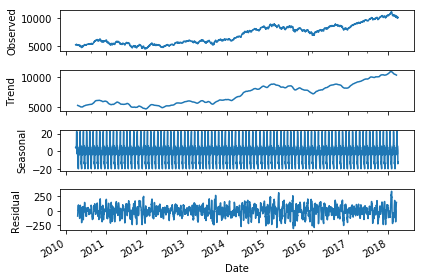

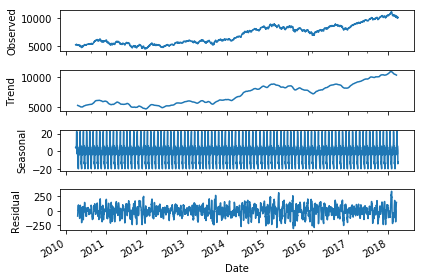

In [53]:

decompose_model21 = seasonal.seasonal_decompose(Nifty_data['Close'],freq=21)
decompose_model21.plot()

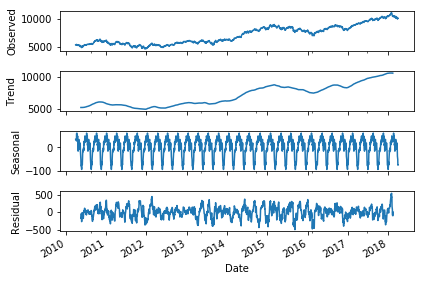

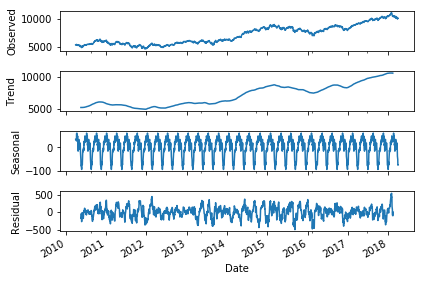

In [54]:

decompose_model63 = seasonal.seasonal_decompose(Nifty_data['Close'],freq=63)
decompose_model63.plot()

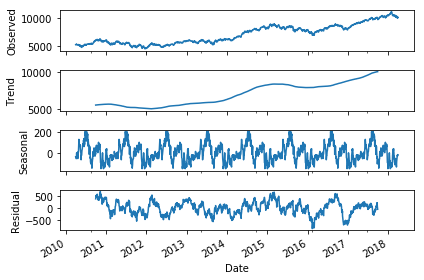

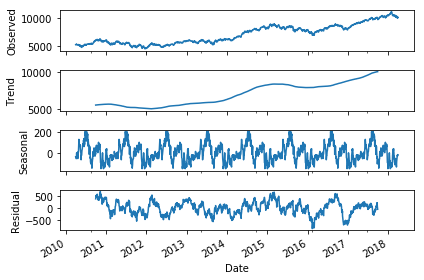

In [55]:

decompose_model252 = seasonal.seasonal_decompose(Nifty_data['Close'],freq=252)
decompose_model252.plot()

In [56]:
def single_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F
Nifty_data['Single_Exponential_Forecast'] = single_smoothing(Nifty_data['Close'], 0.4)

In [57]:
Nifty_data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),year,month,Residuals_Close,Quarter,Single_Exponential_Forecast
Date,,,,,,,,,,,
2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,2010,4,881.702834,Q2,5290.50000
2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,2010,4,956.911493,Q2,5321.66000
2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,2010,4,951.820152,Q2,5339.39600
2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,2010,4,957.778810,Q2,5353.49760
2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,2010,4,884.887469,Q2,5333.87856


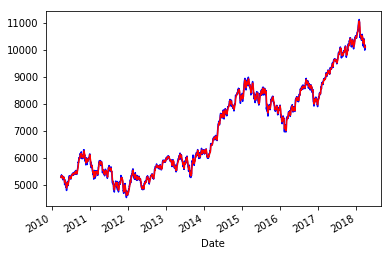

In [58]:
Nifty_data['Close'].plot(color='b')
Nifty_data['Single_Exponential_Forecast'].plot(color='r')

In [59]:
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

Nifty_data['DEF'] = double_exp_smoothing(Nifty_data['Close'], 0.4, 0.7)

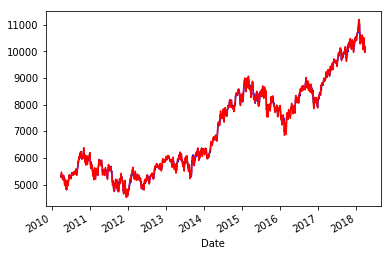

In [60]:
Nifty_data['Close'].plot(color='b')
Nifty_data['DEF'].plot(color='r')


In [85]:
stationary_close=Nifty_data['Close']-Nifty_data['Close'].shift()

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [87]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=21, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [88]:
# Number of samples
n = len(Nifty_data['Close'])

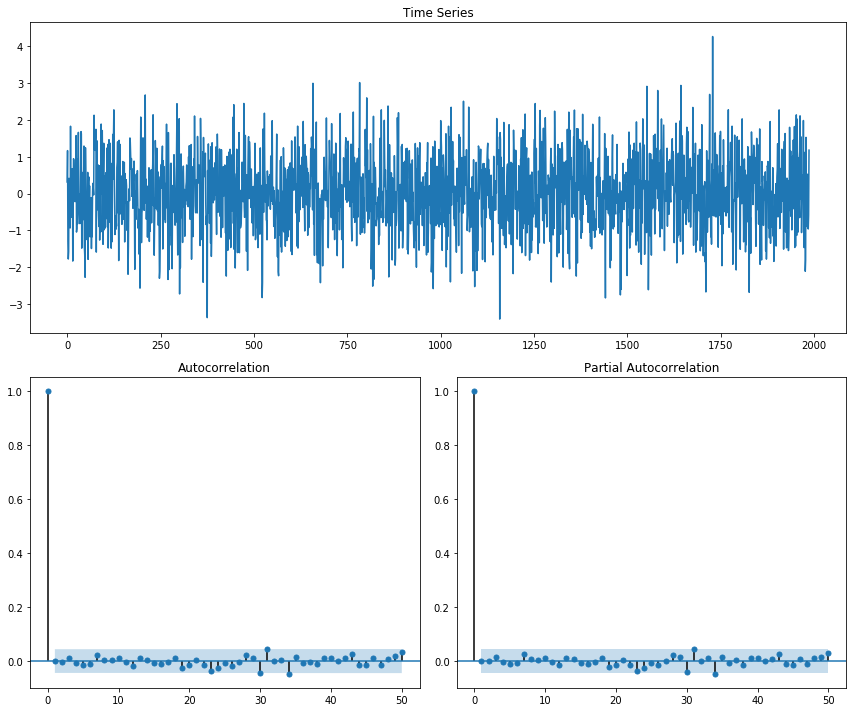

In [92]:
ar = np.r_[Nifty_data['Close'], 0.6]
ma = np.r_[Nifty_data['Close'], 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

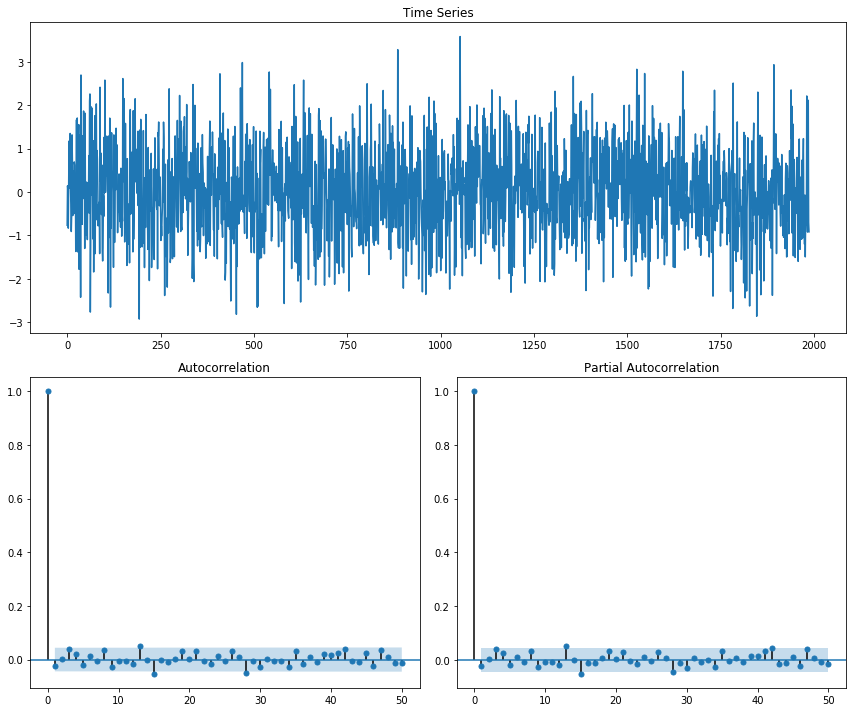

In [93]:
# Generate AR(2) dataset
ar = np.r_[Nifty_data['Close'], 0.6, 0.7]
ma = np.r_[Nifty_data['Close'], 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

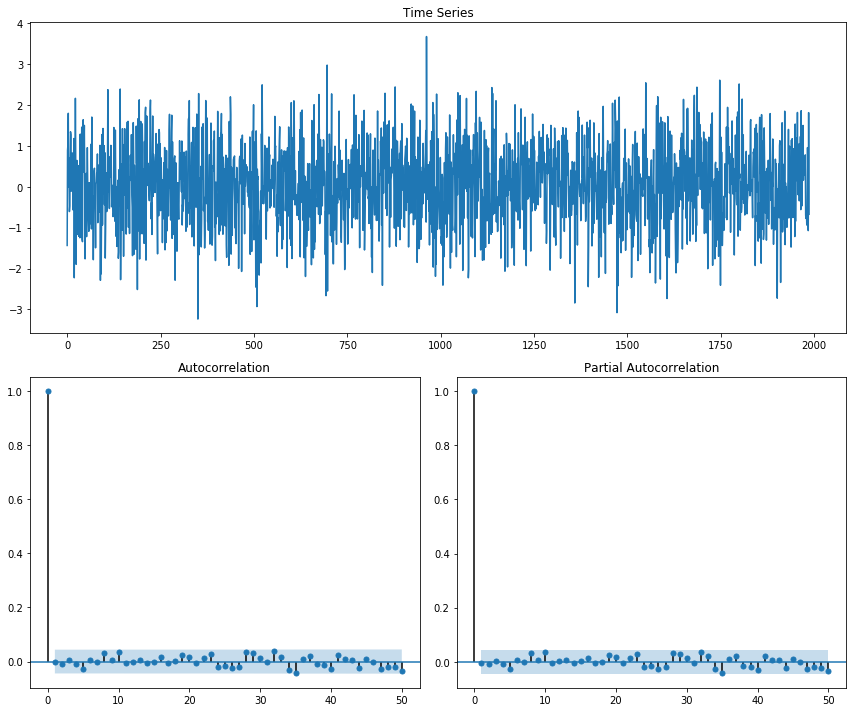

In [94]:
ar = np.r_[Nifty_data['Close'], 0.6, 0.7, 0.5]
ma = np.r_[Nifty_data['Close'], 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [67]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=21, method='mle', trend='nc')
ar1.summary()


C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1987
Model:                     ARMA(1, 0)   Log Likelihood               -2803.287
Method:                           mle   S.D. of innovations              0.992
Date:                Fri, 22 Jun 2018   AIC                           5610.573
Time:                        14:37:05   BIC                           5621.762
Sample:                             0   HQIC                          5614.683
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.0053      0.022      0.235      0.814      -0.039       0.049
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          189.3493           +0.0000j          189.3493            0.0000
-----------------------------------------------------------------------------
"""

In [68]:
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(maxlag=21, method='mle', trend='nc')
ar3.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1987
Model:                     ARMA(3, 0)   Log Likelihood               -2758.815
Method:                           mle   S.D. of innovations              0.970
Date:                Fri, 22 Jun 2018   AIC                           5525.630
Time:                        14:37:06   BIC                           5548.007
Sample:                             0   HQIC                          5533.849
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.0112      0.022     -0.498      0.619      -0.055       0.033
ar.L2.y    -3.644e-05      0.022     -0.002      0.999      -0.044       0.044
ar.L3.y       -0.0435      0.022     -1.939      0.053      -0.087       0.000
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8135           -0.0000j            2.8135           -0.5000
AR.2            1.4063           -2.4883j            2.8582           -0.1681
AR.3            1.4063           +2.4883j            2.8582            0.1681
-----------------------------------------------------------------------------
"""

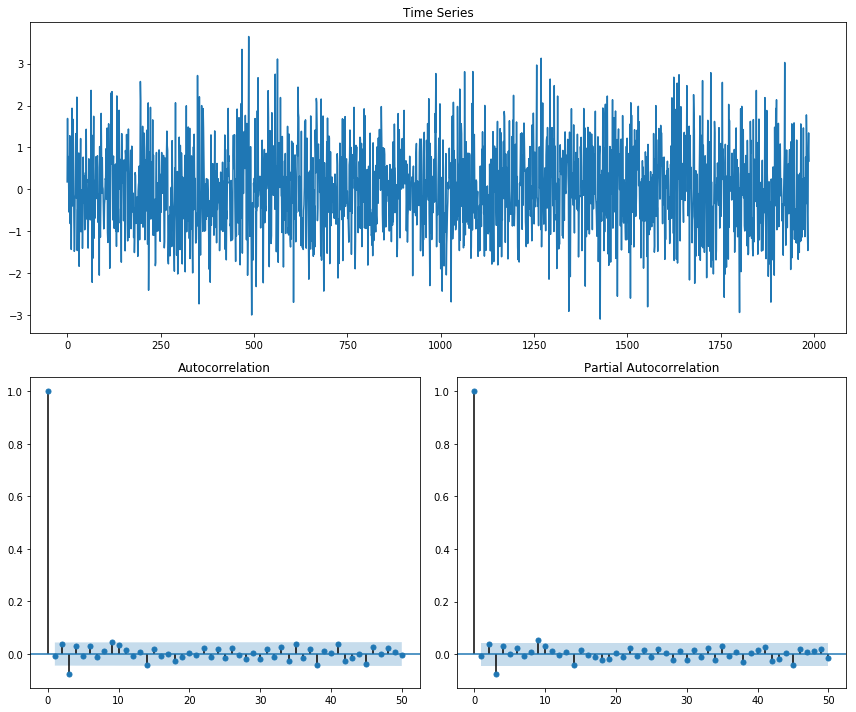

In [70]:
ar = np.r_[Nifty_data['Close'],-0]
ma = np.r_[Nifty_data['Close'], 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

In [72]:
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0,1)).fit(maxlag=21, method='mle', trend='nc')
ma1.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1987
Model:                     ARMA(0, 1)   Log Likelihood               -2863.230
Method:                           mle   S.D. of innovations              1.022
Date:                Fri, 22 Jun 2018   AIC                           5730.460
Time:                        14:42:29   BIC                           5741.648
Sample:                             0   HQIC                          5734.569
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y       -0.0062      0.022     -0.288      0.773      -0.049       0.036
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          160.5063           +0.0000j          160.5063            0.0000
-----------------------------------------------------------------------------
"""

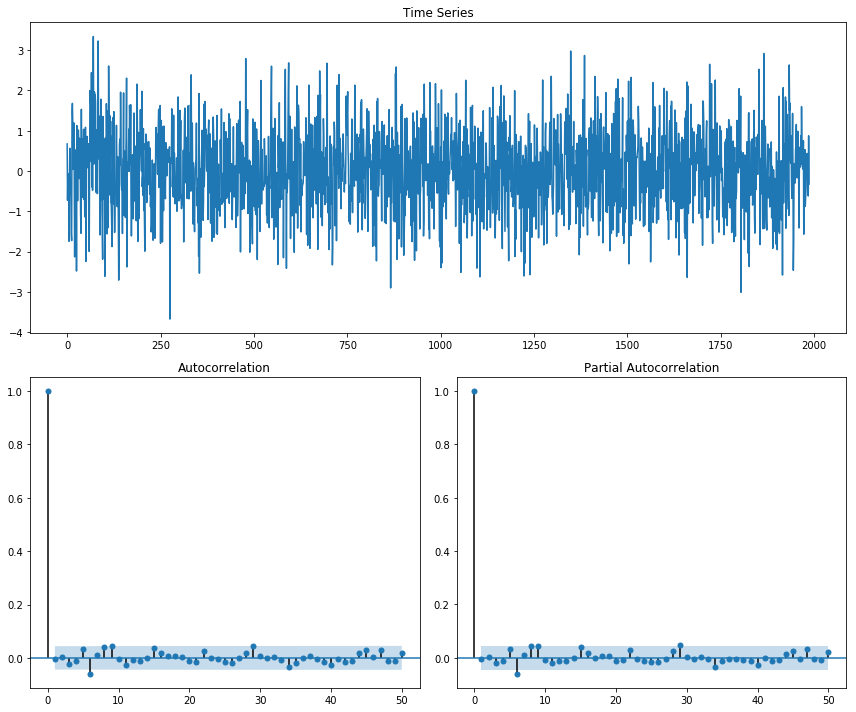

In [73]:
ar = np.r_[Nifty_data['Close'],-0]
ma = np.r_[Nifty_data['Close'],0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [75]:
ma3 = smtsa.ARMA(ma1_data.tolist(), order=(0,3)).fit(maxlag=21, method='mle', trend='nc')
ma3.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1987
Model:                     ARMA(0, 3)   Log Likelihood               -2856.626
Method:                           mle   S.D. of innovations              1.019
Date:                Fri, 22 Jun 2018   AIC                           5721.251
Time:                        14:45:33   BIC                           5743.629
Sample:                             0   HQIC                          5729.471
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.0002      0.022      0.008      0.994      -0.044       0.044
ma.L2.y        0.0368      0.022      1.688      0.092      -0.006       0.080
ma.L3.y       -0.0698      0.022     -3.238      0.001      -0.112      -0.028
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0455           -2.0928j            2.3395           -0.3237
MA.2           -1.0455           +2.0928j            2.3395            0.3237
MA.3            2.6186           -0.0000j            2.6186           -0.0000
-----------------------------------------------------------------------------
"""

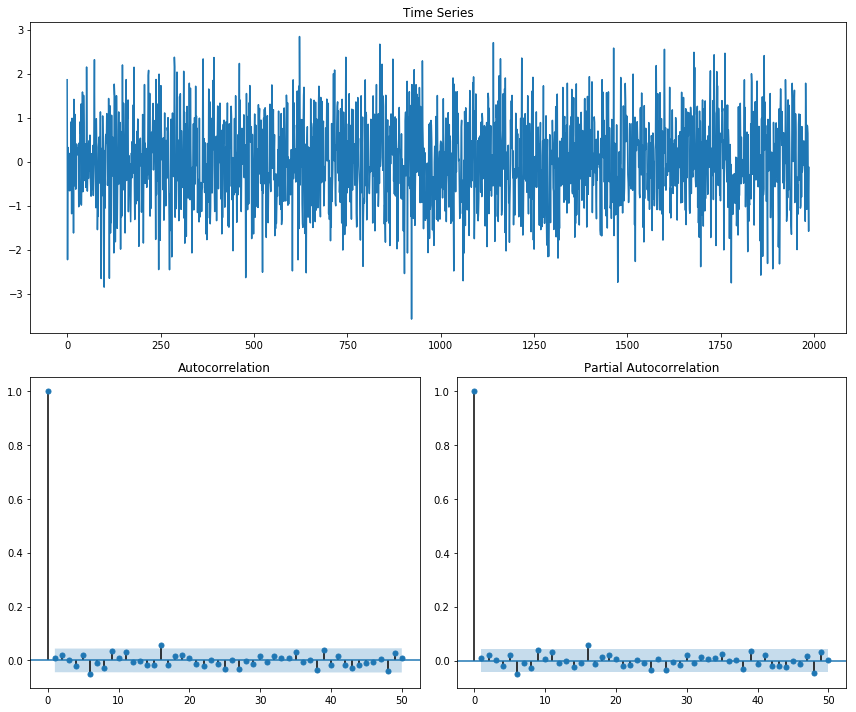

In [82]:
ar = np.r_[Nifty_data['Residuals_Close'],-0.6]
ma = np.r_[Nifty_data['Residuals_Close'], 0.7]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data)

In [83]:
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(0,3)).fit(maxlag=21, method='mle', trend='nc')
ar1ma1.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1987
Model:                     ARMA(0, 3)   Log Likelihood               -2774.482
Method:                           mle   S.D. of innovations              0.978
Date:                Fri, 22 Jun 2018   AIC                           5556.963
Time:                        15:00:39   BIC                           5579.341
Sample:                             0   HQIC                          5565.183
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.0096      0.022      0.425      0.671      -0.035       0.054
ma.L2.y        0.0206      0.023      0.899      0.369      -0.024       0.066
ma.L3.y        0.0003      0.024      0.015      0.988      -0.046       0.047
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.1753           -6.9397j            6.9419           -0.2460
MA.2            0.1753           +6.9397j            6.9419            0.2460
MA.3          -59.4173           -0.0000j           59.4173           -0.5000
-----------------------------------------------------------------------------
"""

In [84]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.